In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#combining the files

# list the files in 8
files = os.listdir('7')
files = [f for f in files if f.startswith('results_test_intermediate_')]

df = pd.DataFrame(columns=['Test', 'Vertices', 'filename', 'Brute Force', 'Brute Force Time','Heuristic', 'Heuristic Time'])

for file in files:
    df_temp = pd.read_csv('7/' + file)
    df = pd.concat([df, df_temp])

df = df.reset_index(drop=True)
df

,Test,Vertices,filename,Brute Force,Brute Force Time,Heuristic,Heuristic Time
0,13,5,"7/test_v(5)_p([0.02, 0.6])_no(13).txt",2,0.005143,2,0.001447
1,8,15,"7/test_v(15)_p([0.02, 0.6])_no(8).txt",4,0.015418,4,0.003551
2,3,25,"7/test_v(25)_p([0.02, 0.6])_no(3).txt",4,0.053108,4,0.026905
3,18,25,"7/test_v(25)_p([0.02, 0.6])_no(18).txt",7,0.181472,7,0.036457
4,13,35,"7/test_v(35)_p([0.02, 0.6])_no(13).txt",7,0.172391,7,0.127767
...,...,...,...,...,...,...,...
107,14,35,"7/test_v(35)_p([0.02, 0.6])_no(14).txt",8,0.694082,8,0.058494
108,9,45,"7/test_v(45)_p([0.02, 0.6])_no(9).txt",10,1.464071,9,0.523412
109,4,55,"7/test_v(55)_p([0.02, 0.6])_no(4).txt",6,0.450791,6,1.811070
110,19,55,"7/test_v(55)_p([0.02, 0.6])_no(19).txt",4,0.244348,4,2.224663


In [4]:
df.to_csv('./7/Final_combined_results.csv', index=False)

In [9]:
#create a metric to check how close the heuristic is to the brute force given vertix count
def accuracy(row):
    accuracy = row['Heuristic'] / row['Brute Force']
    return accuracy

def gap(row):
    gap = (row['Brute Force'] - row['Heuristic'])/row['Brute Force']
    return gap

In [10]:
df['Accuracy'] = df.apply(accuracy, axis=1)
df['Gap'] = df.apply(gap, axis=1)

df

,Test,Vertices,filename,Brute Force,Brute Force Time,Heuristic,Heuristic Time,Accuracy,Gap
0,13,5,"7/test_v(5)_p([0.02, 0.6])_no(13).txt",2,0.005143,2,0.001447,1.000000,0.000000
1,8,15,"7/test_v(15)_p([0.02, 0.6])_no(8).txt",4,0.015418,4,0.003551,1.000000,0.000000
2,3,25,"7/test_v(25)_p([0.02, 0.6])_no(3).txt",4,0.053108,4,0.026905,1.000000,0.000000
3,18,25,"7/test_v(25)_p([0.02, 0.6])_no(18).txt",7,0.181472,7,0.036457,1.000000,0.000000
4,13,35,"7/test_v(35)_p([0.02, 0.6])_no(13).txt",7,0.172391,7,0.127767,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
107,14,35,"7/test_v(35)_p([0.02, 0.6])_no(14).txt",8,0.694082,8,0.058494,1.000000,0.000000
108,9,45,"7/test_v(45)_p([0.02, 0.6])_no(9).txt",10,1.464071,9,0.523412,0.900000,0.100000
109,4,55,"7/test_v(55)_p([0.02, 0.6])_no(4).txt",6,0.450791,6,1.811070,1.000000,0.000000
110,19,55,"7/test_v(55)_p([0.02, 0.6])_no(19).txt",4,0.244348,4,2.224663,1.000000,0.000000


In [25]:
#group by vertix size and get the mean of the accuracy and gap
df_grouped = df.groupby('Vertices').mean().reset_index()

df_grouped

/tmp/ipykernel_341629/3246248677.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('Vertices').mean().reset_index()


,Vertices,Brute Force Time,Heuristic Time,Accuracy,Gap
0,5,0.007080,0.002826,0.968750,0.031250
1,15,0.031589,0.006339,0.973958,0.026042
2,25,0.181411,0.044705,0.964410,0.035590
3,35,20.787517,0.144671,0.993056,0.006944
4,45,103.589888,0.335647,0.943155,0.056845
5,55,69.681639,0.846054,0.945037,0.054963
6,65,176.469893,1.364052,0.975000,0.025000


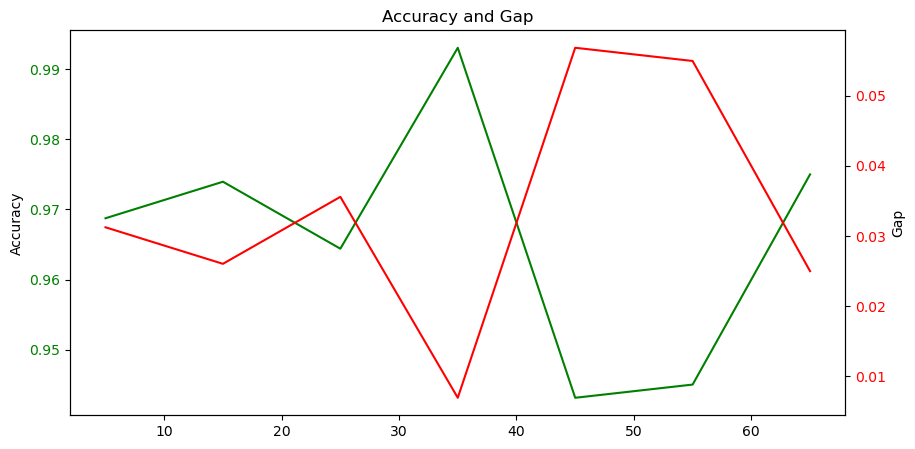

In [33]:
#plot the accuracy and gap on opposite ends on the same graph
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['Vertices'], df_grouped['Accuracy'], 'g-')
plt.ylabel('Accuracy')
plt.yticks(color='g')
plt.twinx()
plt.plot(df_grouped['Vertices'], df_grouped['Gap'], 'r-')
plt.xlabel('Vertices')
plt.ylabel('Gap')
plt.yticks(color='r')
plt.title('Accuracy and Gap')
#show both on the legend 
plt.savefig('./7/Accuracy_and_Gap.png')
plt.show()




In [34]:
df_grouped

,Vertices,Brute Force Time,Heuristic Time,Accuracy,Gap
0,5,0.007080,0.002826,0.968750,0.031250
1,15,0.031589,0.006339,0.973958,0.026042
2,25,0.181411,0.044705,0.964410,0.035590
3,35,20.787517,0.144671,0.993056,0.006944
4,45,103.589888,0.335647,0.943155,0.056845
5,55,69.681639,0.846054,0.945037,0.054963
6,65,176.469893,1.364052,0.975000,0.025000


In [35]:
#some information
df_grouped.describe()

,Vertices,Brute Force Time,Heuristic Time,Accuracy,Gap
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,35.000000,52.964145,0.392042,0.966195,0.033805
std,21.602469,67.729571,0.522207,0.017548,0.017548
min,5.000000,0.007080,0.002826,0.943155,0.006944
25%,20.000000,0.106500,0.025522,0.954724,0.025521
50%,35.000000,20.787517,0.144671,0.968750,0.031250
75%,50.000000,86.635763,0.590851,0.974479,0.045276
max,65.000000,176.469893,1.364052,0.993056,0.056845
